## Zapisz kopię pliku na dysku iz mień jego nazwę *Python_czyszczenieDanych_ImieNazwisko.jpynb*

## Wczytaj biblioteki:
- numpy
- pandas

In [2]:
import pandas as pd
import numpy as np

## Wczytaj plik "flavors_of_cacao.csv" i wyświetl 5 pierwszych wierszy

In [3]:
df = pd.read_csv('flavors_of_cacao.csv')
poczatkowa_liczba_wierszy = df.shape[0]

In [4]:
df.head(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Zmień nazwy kolumn na:
'Company', 'Specific_Bean_Origin_or_Bar_Name', 'REF','Review_Date', 'Cocoa_Percentage', 'Company_Location','Rating', 'Bean_Type', 'Broad_Bean_Origin'
###i wyświetl 3 pierwsze wiersze


In [5]:
df = df.rename(columns={'Company (Maker-if known)': 'Company',
                        'Specific Bean Origin or Bar Name': 'Specific_Bean_Origin_or_Bar_Name',
                        'REF': 'REF',
                        'Review Date': 'Review_Date',
                        'Cocoa Percent': 'Cocoa_Percentage',
                        'Company Location': 'Company_Location',
                        'Rating': 'Rating',
                        'Bean Type': 'Bean_Type',
                        'Broad Bean Origin': 'Broad_Bean_Origin'})

df.head(3)


,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


### Wyfiltruj 3 wiersz (komórkę) dla zmiennej *Review_Date*

In [6]:
filtered_df = df.iloc[2]
filtered_df

Company                             A. Morin
Specific_Bean_Origin_or_Bar_Name      Atsane
REF                                     1676
Review_Date                             2015
Cocoa_Percentage                         70%
Company_Location                      France
Rating                                   3.0
Bean_Type                                   
Broad_Bean_Origin                       Togo
Name: 2, dtype: object

### Wyfiltruj komórki obejmujące kolumny od 2 do 4 i wiersze od 1 do 5.

In [7]:
filtered_df = df.iloc[1:6, 1:4]
filtered_df


,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date
1,Kpime,1676,2015
2,Atsane,1676,2015
3,Akata,1680,2015
4,Quilla,1704,2015
5,Carenero,1315,2014


### Wyświtl "kształt" zbioru - liczba wierszy i kolumn

In [8]:
df.shape


(1795, 9)

### Wyświetl informcje o zbiorze danych
### Czy wyświetlają się onformacje o "brakach" w zmiennej *Bean_Type* widocznych po użyciu funkcji head?
### Dlaczego zmienna *Cocoa_Percentage* jest typu object?

### Usuń znak "%" w zmiennej *Cocoa_Percentage* - ustaw odpowiednio typ danej i wyświetl 3 pierwsze wiersze


In [9]:
df['Cocoa_Percentage'] = df['Cocoa_Percentage'].str.replace('%', '').astype(float)
df.head(3)


,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo


### Wyfiltruj w zmiennych *Bean_Type* i *Broad_Bean_Origin* "niewidoczne braki danych" i zamień je na NA

In [10]:
df['Bean_Type'] = df['Bean_Type'].replace(' ', 'NA')
df['Broad_Bean_Origin'] = df['Broad_Bean_Origin'].replace(' ', 'NA')


In [11]:
df.head(5)

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NA,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NA,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NA,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NA,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NA,Peru


### Sprawdź czy puste komórki występują jednoszcześnie w zmiennej *Bean_Type* i *Broad_Bean_Origin*. Jesli tak, to policz ile jest takich wierszy i usuń całe wiersze dla tych przypadków

In [12]:
empty_rows = df[df['Bean_Type'].isna() & df['Broad_Bean_Origin'].isna()]
df = df.dropna(subset=['Bean_Type', 'Broad_Bean_Origin'])

liczba_pustych_wierszy = poczatkowa_liczba_wierszy - df.shape[0]
print(f'Usunięto {liczba_pustych_wierszy} wierszy z pustymi wartościami')

Usunięto 2 wierszy z pustymi wartościami


### Wyświetl ponownie kształ zbioru.

In [13]:
df.shape

(1793, 9)

### Dodaj do ramki danych nową kolumnę *Chocolate_Type*, która będzie zawierała informajce czy dana czekolada jest gorzka czy nie? W tym celu wykorzystaj zmienną *Cocoa_Percentage*.

In [14]:
df['Chocolate_Type'] = df['Cocoa_Percentage'].apply(lambda x: 'Gorzka' if x >= 70 else 'Niegorzka')


In [15]:
df.head(5)

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Chocolate_Type
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NA,Sao Tome,Niegorzka
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NA,Togo,Gorzka
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NA,Togo,Gorzka
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NA,Togo,Gorzka
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NA,Peru,Gorzka


### Dodaj zmienną kategoryczną *Rating_Grade* opisującą ocenę czekolady. Przyjmij następujące przedziały:
System oceny smaków kakao:
- 5 -  Elite (Przekraczanie poza zwykłe granice)
- $<4;5)$ -  Premium (Doskonały rozwój smaku, charakteru i stylu)
- $<3;4)$ - Satisfactory (3,0) do godnego pochwały (3,75) (dobrze wykonany, o specjalnych właściwościach)
- $<2;3)$ - Disappointing (Zadowalający, ale zawiera co najmniej jedną istotną wadę)
- $<1;2)$ - Unpleasant (przeważnie niesmaczny)

In [16]:
rating_bins = [0, 2, 3, 4,4.999999, 5]
rating_labels = ['Unpleasant', 'Disappointing', 'Satisfactory', 'Premium', 'Elite']

df['Rating_Grade'] = pd.cut(df['Rating'], bins=rating_bins, labels=rating_labels, right=False, include_lowest=True)


In [17]:
df.head(10)


,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Chocolate_Type,Rating_Grade
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NA,Sao Tome,Niegorzka,Satisfactory
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NA,Togo,Gorzka,Disappointing
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NA,Togo,Gorzka,Satisfactory
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NA,Togo,Gorzka,Satisfactory
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NA,Peru,Gorzka,Satisfactory
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela,Gorzka,Disappointing
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,NA,Cuba,Gorzka,Satisfactory
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela,Gorzka,Satisfactory
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela,Gorzka,Satisfactory
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,NA,Peru,Gorzka,Premium


### Dla zmiennych numerycznych oblicz statystyki opisowe

In [18]:
df.describe()


,REF,Review_Date,Cocoa_Percentage,Rating
count,1793.000000,1793.000000,1793.000000,1793.000000
mean,1036.126046,2012.326269,71.699108,3.185862
std,553.128742,2.928666,6.326515,0.477668
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,3.000000
50%,1073.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


### Dla zmiennych kategorycznych zlicz unikalne wartości

In [19]:
categorical_columns = ['Company', 'Specific_Bean_Origin_or_Bar_Name', 'Company_Location', 'Bean_Type', 'Broad_Bean_Origin', 'Chocolate_Type', 'Rating_Grade']

unique_values = df[categorical_columns].nunique()
print(unique_values)


Company                              416
Specific_Bean_Origin_or_Bar_Name    1038
Company_Location                      60
Bean_Type                             41
Broad_Bean_Origin                     99
Chocolate_Type                         2
Rating_Grade                           4
dtype: int64


### Policz średnią ocen dla czekolady mlecznej i gorzkiej (wykonaj pivot table lub tabelę grupującą)

In [20]:
chocolate_avg_ratings = df.groupby('Chocolate_Type')['Rating'].mean()
chocolate_avg_ratings

Chocolate_Type
Gorzka       3.185324
Niegorzka    3.188262
Name: Rating, dtype: float64

### Przygoyuj tablę raportującą która zliczy ilość unikalnych typów ocen () w poszczególnych latah dla czekolady mlecznej i gorzkiej
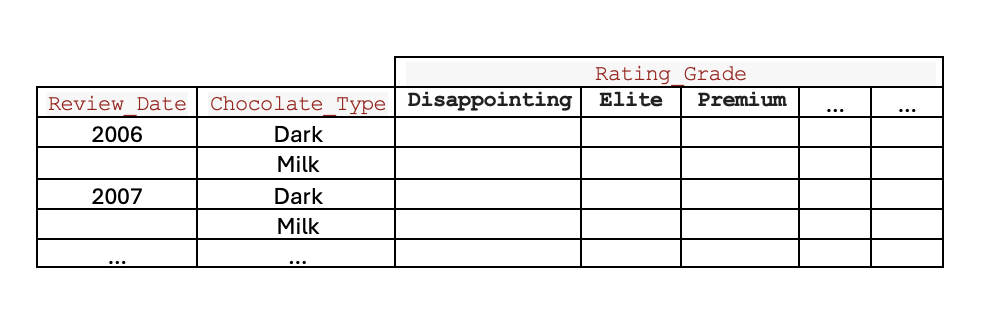

In [21]:
# Dodanie nowej kolumny dla kategorii gorzkiej i niegorzkiej
df['Gorzka_Niegorzka'] = df['Chocolate_Type'].apply(lambda x: 'Gorzka' if x == 'gorzka' else 'Niegorzka')

# Tworzenie tabeli pivotującej
pivot_table_result = df.pivot_table(values='Chocolate_Type', index='Review_Date', columns=['Gorzka_Niegorzka', 'Rating_Grade'], aggfunc='count', fill_value=0)
pivot_table_result

C:\Users\patry\AppData\Local\Temp\ipykernel_7368\806255379.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_result = df.pivot_table(values='Chocolate_Type', index='Review_Date', columns=['Gorzka_Niegorzka', 'Rating_Grade'], aggfunc='count', fill_value=0)


Gorzka_Niegorzka  Niegorzka                                         
Rating_Grade     Unpleasant Disappointing Satisfactory Premium Elite
Review_Date                                                         
2006                      3            15           38      15     0
2007                      3            14           48      11     0
2008                      2            34           54       3     0
2009                      2            33           84       4     0
2010                      2            28           78       3     0
2011                      2            35          113      14     0
2012                      2            49          132      11     0
2013                      1            48          122      13     0
2014                      0            62          179       6     0
2015                      0            55          222       8     0
2016                      0            54          156       9     0
2017                      0             4           20       0     0

## Zapisz plik do pdf (Plik -> Drukuj -> PDF) i umieśc go na upelu.